# Kickstarter Success Project

### Table of Contents

1. Deadline/Duration vs. SF (DL)
2. Staff pick vs. SF (Sean)
3. Goal (amount) vs. SF (Sean)
4. Spotlight vs. SF (Sean)
5. Category vs. SF (C)
6. Category vs. Location (Center of Category) (DL)
7. Map
8. Probability of Success in center vs P(success) out of center (DL)
9. Length of title vs. SF (FM)
10. Blurb Length vs. SF (FM)
11. Total pledged vs. category (S)
12. Avg. pledged by individual (pledge amount/backers count) vs. category (S)

First, we import all the libraries we need.

In [1]:
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
plt.style.use('fivethirtyeight')
from geopy.geocoders import Nominatim

sns.set()
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_rows', 20)

Then we load our datasets from https://webrobots.io/kickstarter-datasets/, a web crawler ...
We used data up to 2018/09/13 and chose the first 3 datasets, which are random in time and success state.

In [2]:
def fix_digits(n):
    zeroes = 2 - int(math.log10(n))
    return zeroes*'0'+str(n) if n != 0 else None

In [3]:
fix_digit = []
for i in np.arange(50):
    fix_digit.append(fix_digits(i+1))

In [4]:
file = []
for i in np.arange(50):
     file.append(pd.read_csv('Kickstarter'+str(fix_digit[i])+'.csv'))
#pd.read_csv('Kickstarter001.csv')
#kick2=pd.read_csv('Kickstarter002.csv')
#kick3=pd.read_csv('Kickstarter003.csv')
#kick=pd.concat([kick1,kick2,kick3]).reset_index(drop=True)
#kick
kick=pd.concat(file).reset_index(drop=True)
kick

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,20,The Digital Drum Circle is a MIDI controller t...,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",2080,US,1296755841,"{""id"":248631452,""name"":""Russell Ouellett"",""is_...",USD,$,True,USD,1307115826,False,NaN,1.000000,2000.0,935527100,NaN,False,NaN,1299257026,"{""id"":2373572,""name"":""Cambridge"",""slug"":""cambr...","A Digital Drum Circle for therapy, fun, commun...",NaN,"{""key"":""assets/011/275/169/20d1931caf9d71d6293...",2080.00,"{""id"":22536,""project_id"":22536,""state"":""inacti...",a-digital-drum-circle-for-therapy-fun-communit...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1307115828,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2080.000000,international
1,100,From the depths of hell she has been reborn. ...,"{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",6739,US,1420452898,"{""id"":141969677,""name"":""Elizabeth and Shelby R...",USD,$,True,USD,1424926740,False,NaN,1.000000,6000.0,1085056437,NaN,False,NaN,1421820331,"{""id"":2411084,""name"":""Glendale"",""slug"":""glenda...",'Madam Satan: Deadly Origins' A Graphic Novel,NaN,"{""key"":""assets/011/990/778/d8d73c0e8246ca50569...",6739.00,"{""id"":1611485,""project_id"":1611485,""state"":""in...",madam-satan-deadly-origins-a-graphic-novel,https://www.kickstarter.com/discover/categorie...,True,False,successful,1424926744,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6739.000000,international
2,205,"Integrated GoPro mounting system, water resist...","{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",12656,US,1492807263,"{""id"":955323951,""name"":""London Lazerson"",""is_r...",USD,$,True,USD,1498146592,False,NaN,1.000000,12000.0,51963086,NaN,False,NaN,1494258592,"{""id"":2477080,""name"":""Provo"",""slug"":""provo-ut""...",Sticky Sounds Speaker: Insanely rugged & mount...,NaN,"{""key"":""assets/016/348/132/c79ec4b75bb5771b0d9...",12656.00,"{""id"":2970911,""project_id"":2970911,""state"":""in...",sticky-sounds-insanely-rugged-and-mounts-to-an...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1498146592,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",12656.000000,international
3,44,A world where bread has risen and mindlessly w...,"{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",1128,GB,1517169465,"{""id"":2125561390,""name"":""Caleb Paullus"",""slug""...",GBP,£,False,USD,1521267543,False,NaN,1.300801,500.0,764528336,NaN,False,NaN,1518679143,"{""id"":44418,""name"":""London"",""slug"":""london-gb""...",The Walking Bread,NaN,"{""key"":""assets/020/119/024/76934429996f706a13f...",809.00,"{""id"":3291434,""project_id"":3291434,""state"":""ac...",the-walking-bread,https://www.kickstarter.com/discover/categorie...,True,False,successful,1521267544,1.389543,"{""web"":{""project"":""https://www.kickstarter.com...",1124.140392,international
4,2,Saving our World one Lawn and Garden at a time.,"{""id"":361,""name"":""Web"",""slug"":""journalism/web""...",120,US,1480984713,"{""id"":1636940137,""name"":""Wells Rawls and Stace...",USD,$,True,USD,1486186445,False,NaN,1.000000,8000.0,194906114,NaN,False,NaN,1481002445,"{""id"":2489025,""name"":""Sarasota"",""slug"":""saraso...",Gardenbiotics Media Start Up,NaN,"{""key"":""assets/014/783/540/ec0a4f31290a5fbfd89...",120.00,"{""id"":2788206,""project_id"":2788206,""state"":""in...",our-lawns-are-killing-us-learn-how-to-grow-org...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1486186446,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",120.0000

## 1. Duration vs. Success

In this part, we are looking at a campaign's **duration** (we define duration by the period between moment the creator launched the project and their final deadline.) and whether they are successful or not to determine if there's some sort of correlation between them.

### Clearing data

Below we cleared the data to contain only the project launch date, deadline, and their state of success or failure. We are also not looking at projects that are still live, suspended, or cancelled. Also, the dates in the raw dataset are expressed in epoch time; we convert them into readable times.

In [5]:
kick_duration=kick[kick['state'].isin(['successful','failed'])].loc[:,['launched_at','deadline','state']].reset_index(drop=True)
kick_duration['launched_at']=pd.to_datetime(kick_duration['launched_at'],unit='s')
kick_duration['deadline']=pd.to_datetime(kick_duration['deadline'],unit='s')
kick_duration

,launched_at,deadline,state
0,2011-03-04 16:43:46,2011-06-03 15:43:46,successful
1,2015-01-21 06:05:31,2015-02-26 04:59:00,successful
2,2017-05-08 15:49:52,2017-06-22 15:49:52,successful
3,2018-02-15 07:19:03,2018-03-17 06:19:03,successful
4,2016-12-06 05:34:05,2017-02-04 05:34:05,failed
5,2017-03-30 21:14:42,2017-05-29 21:14:42,successful
6,2018-05-22 11:07:16,2018-06-21 11:07:16,successful
7,2016-10-11 12:19:28,2016-11-10 13:19:28,failed
8,2014-12-22 22:12:42,2015-01-31 22:00:00,successful
9,2018-05-18 16:13:58,2018-06-27 16:13:58,failed


Now we compute the duration of each project using the data above.

In [6]:
kick_duration['duration']=(kick_duration['deadline']-kick_duration['launched_at']).dt.days
kick_duration.loc[:,['state','duration']]

,state,duration
0,successful,90
1,successful,35
2,successful,45
3,successful,29
4,failed,60
5,successful,60
6,successful,30
7,failed,30
8,successful,39
9,failed,40


### Data Visualization

We now visualize the data in various ways to visually determine if there's any correlation.

#### Boxplot

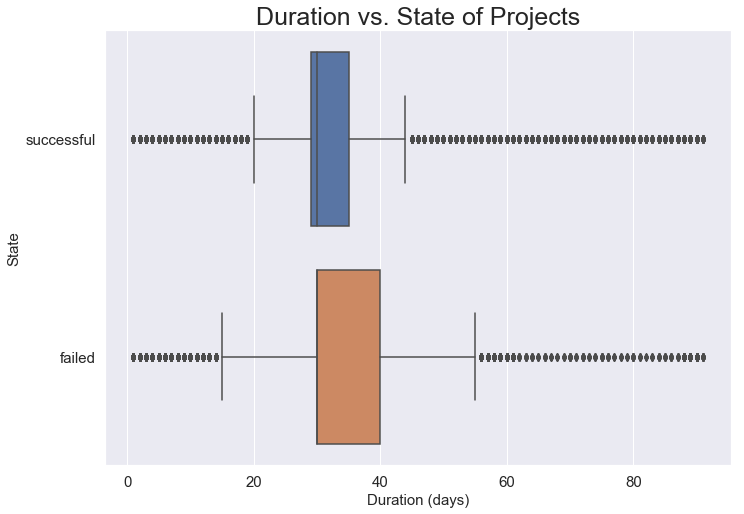

In [7]:
plt.figure(figsize=(10, 8))
fig1 = sns.boxplot(x='duration',y='state',data=kick_duration,linewidth=1.5)
fig1.set_title("Duration vs. State of Projects", fontsize = 25)
fig1.set_xlabel("Duration (days)", fontsize = 15)
fig1.set_ylabel("State", fontsize = 15)
fig1.tick_params(labelsize = 15)

##### **(Insert analysis here)**

#### Histogram

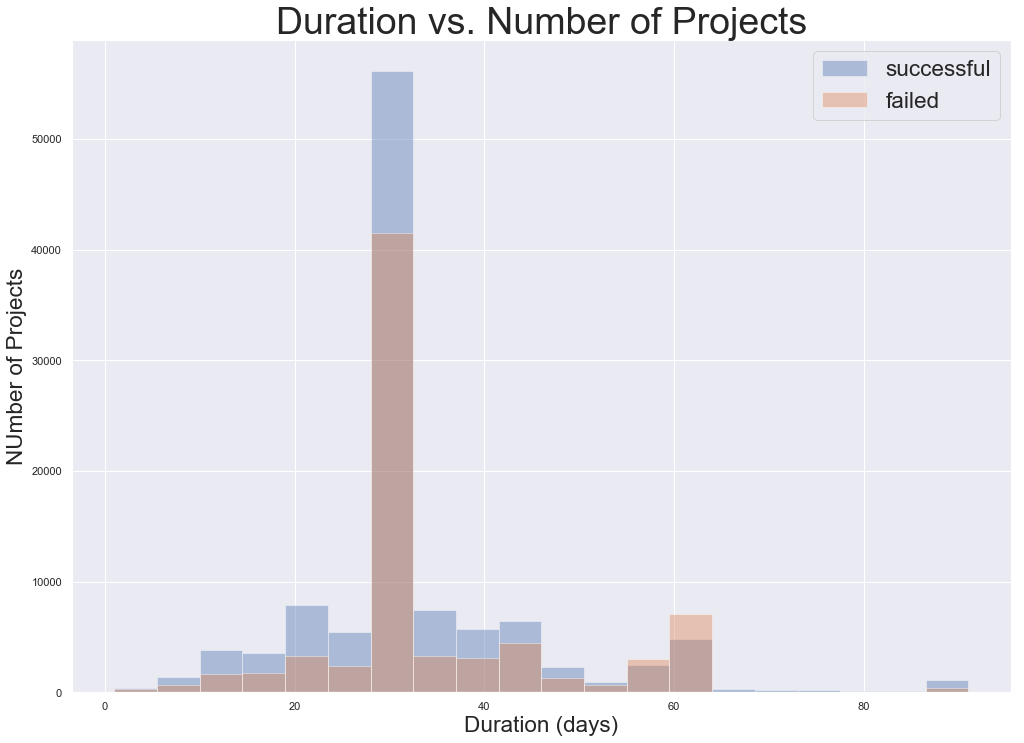

In [10]:
plt.figure(figsize=(10*1.5, 8*1.5))
for state in ['successful','failed']:
    fig2 = sns.distplot(kick_duration.loc[kick_duration['state']==state,'duration'], kde=False, bins=20, label=state)

fig2.set_title("Duration vs. Number of Projects", fontsize = 25*1.5)
fig2.set_xlabel("Duration (days)", fontsize = 15*1.5)
fig2.set_ylabel("NUmber of Projects", fontsize = 15*1.5)
plt.legend(fontsize = 15*1.5)

### A/B Testing

Here we are using A/B Testing to determine if there's theoretical relationship between duration and state.

**Wonder what would be an appropriate test statistic, the average duration, or Sean's possibility of succeeding?**

## 6. Category vs. Location

Some of the rows don't contain location data, so we filter them out first:

In [70]:
kick_notnull=kick[kick['location'].notnull()].reset_index(drop=True)

In [71]:
kick_notnull.loc[49,'location']

'{"id":2486982,"name":"St. Louis","slug":"st-louis-mo","short_name":"St. Louis, MO","displayable_name":"St. Louis, MO","localized_name":"St. Louis","country":"US","state":"MO","type":"Town","is_root":false,"urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/st-louis-mo","location":"https://www.kickstarter.com/locations/st-louis-mo"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1536872511.58b304e63e00fdfacaaf548263b6ed274bacf7e6&woe_id=2486982"}}}'

Get categories:

In [11]:
len(kick_notnull.index)

199827

In [12]:
def get_category (df, row):
    return ast.literal_eval(df.loc[row,'category'])['slug'].split('/')[0]

In [13]:
categories=np.array([])
for row in np.arange(len(kick_notnull.index)):
    one=get_category(kick_notnull, row)
    categories=np.append(categories,one)
    
categories

array(['music', 'comics', 'technology', ..., 'music', 'publishing',
       'film & video'], dtype='<U32')

Get locations:

In [14]:
ast.literal_eval(kick.loc[0,'location'].replace('false',"False"))['name']

'Cambridge'

In [15]:
def get_location (df, row, label):
    """Get the location of a given row in a df that has a column 'location' in the form specified by the label."""
    
    return ast.literal_eval(df.loc[row,'location'].replace('true',"True").replace('false','False').replace('null','None'))[label]

In [19]:
locations=np.array([])
for row in np.arange(len(kick_notnull.index)):
    one_location=get_location(kick_notnull,row,'displayable_name')
    locations=np.append(locations,one_location)

locations

array(['Cambridge, MA', 'Glendale, AZ', 'Provo, UT', ..., 'Knoxville, TN',
       'West Palm Beach, FL', 'Riverside, CA'], dtype='<U49')

In [20]:
cate_loc=pd.DataFrame({'Category':categories,'Location':locations})
cate_loc

,Category,Location
0,music,"Cambridge, MA"
1,comics,"Glendale, AZ"
2,technology,"Provo, UT"
3,comics,"London, UK"
4,journalism,"Sarasota, FL"
5,comics,"Manhattan, NY"
6,technology,"Chicago, IL"
7,technology,"San Diego, CA"
8,journalism,"Cambridge, MA"
9,food,"Kiowa, CO"


In [72]:
cate_loc = pd.read_csv('cate_loc.csv').loc[:,['Category','Location']]
cate_loc

,Category,Location
0,music,"Cambridge, MA"
1,comics,"Glendale, AZ"
2,technology,"Provo, UT"
3,comics,"London, UK"
4,journalism,"Sarasota, FL"
5,comics,"Manhattan, NY"
6,technology,"Chicago, IL"
7,technology,"San Diego, CA"
8,journalism,"Cambridge, MA"
9,food,"Kiowa, CO"


In [76]:
cate_loc_count=cate_loc.groupby(['Category', 'Location']).size().to_frame(name='count').reset_index()
cate_loc_count

,Category,Location,count
0,art,"'s-Heerenberg, Netherlands",1
1,art,"Aalborg, Denmark",3
2,art,"Abbotsford, AU",2
3,art,"Abbotsford, Canada",3
4,art,"Abeokuta, Nigeria",1
5,art,"Aberdeen, SD",1
6,art,"Aberdeen, UK",4
7,art,"Aberdeenshire, UK",1
8,art,"Aberystwyth, UK",1
9,art,"Abilene, KS",1


In [10]:
cate_loc_count.to_csv('cate_loc_count.csv')

In [73]:
category_name = ['art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video', 'food', 'games', 'journalism', 'music', 'photography', 'publishing', 'technology', 'theater']

In [77]:
tech_loc_cate=cate_loc_count.loc[cate_loc_count['Category']=='technology',:].sort_values('count',ascending=False).reset_index(drop=True)
tech_loc_cate

,Category,Location,count
0,technology,"London, UK",667
1,technology,"Los Angeles, CA",630
2,technology,"San Francisco, CA",595
3,technology,"New York, NY",559
4,technology,"Toronto, Canada",276
5,technology,"Chicago, IL",269
6,technology,"San Diego, CA",250
7,technology,"Boston, MA",234
8,technology,"Austin, TX",222
9,technology,"Seattle, WA",219


In [78]:
loc_cat = []
for category in category_name:
    loc_cat.append(cate_loc_count.loc[cate_loc_count['Category']==category,:].sort_values('count',ascending=False).reset_index(drop=True))
art_center=loc_cat[0].loc[0:2,'Location']

In [79]:
center_city = {}
for i in range(len(category_name)):
    center_city[category_name[i]] = loc_cat[i].loc[0:2,'Location'].tolist()

center_city['technology']

['London, UK', 'Los Angeles, CA', 'San Francisco, CA']

In [80]:
geopy.geocoders.options.default_timeout = 1
geolocator = Nominatim(user_agent='Google Map')
tech_loc_cate.loc[0:100,'Location'].apply(geolocator.geocode, 1).to_frame()

NameError: name 'geopy' is not defined

In [81]:
cate_loc_count.loc[cate_loc_count['Location']=='New Orleans',:].sort_values('count',ascending=False)

,Category,Location,count


In [82]:
get_location(kick_notnull,1,'displayable_name')

NameError: name 'get_location' is not defined

## 8. Probability of Success In Center vs. Out of Center

In [83]:
cate_loc['state']=kick_notnull['state']
cl_state=cate_loc
cate_loc=pd.read_csv('cate_loc.csv').loc[:,['Category','Location']]
cate_loc

,Category,Location
0,music,"Cambridge, MA"
1,comics,"Glendale, AZ"
2,technology,"Provo, UT"
3,comics,"London, UK"
4,journalism,"Sarasota, FL"
5,comics,"Manhattan, NY"
6,technology,"Chicago, IL"
7,technology,"San Diego, CA"
8,journalism,"Cambridge, MA"
9,food,"Kiowa, CO"


In [86]:
art_center_succ_prop=np.count_nonzero(cl_state[cl_state['Location'].isin(center_city['art'])]['state']=='successful')/len(cl_state[cl_state['Location'].isin(center_city['art'])])
art_center_succ_prop

0.6462619959717231

In [87]:
art_not_center_succ_prop = np.count_nonzero(cl_state[~cl_state['Location'].isin(center_city['art'])]['state'] == 'successful')/len(cl_state[~cl_state['Location'].isin(center_city['art'])])
art_not_center_succ_prop

0.5349959313719872

In [88]:
in_prop = {}
out_prop = {}
for category in category_name:
    in_prop[category] = np.count_nonzero(cl_state[cl_state['Location'].isin(center_city[category])]['state']=='successful')/len(cl_state[cl_state['Location'].isin(center_city[category])])
    out_prop[category] = np.count_nonzero(cl_state[~cl_state['Location'].isin(center_city[category])]['state'] == 'successful')/len(cl_state[~cl_state['Location'].isin(center_city[category])])


In [89]:
in_prop_df = pd.DataFrame.from_dict(in_prop, orient = 'index',columns = ['Probability of Success in Center'])

In [90]:
out_prop_df = pd.DataFrame.from_dict(out_prop, orient = 'index',columns = ['Probability of Success out of Center'])

In [91]:
in_prop_df["Probability of Success out of Center"]=out_prop_df['Probability of Success out of Center']
in_out_prop_df = in_prop_df

In [92]:
in_out_prop_df=in_out_prop_df.sort_values('Probability of Success in Center',ascending=False)

Text(0.5,1,'Probability of Success in Relation to Center')

<Figure size 720x576 with 0 Axes>

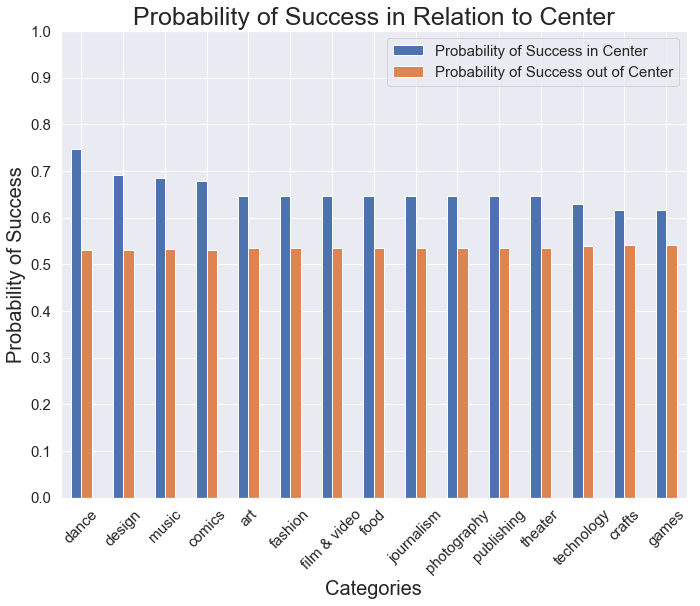

In [112]:
plt.figure(figsize = (10, 8))
fig3 = in_out_prop_df.plot.bar(rot = 45, fontsize = 15)
plt.gcf().set_size_inches(10,8)
plt.ylim(0, 1)
plt.yticks(np.arange(0,1.05,0.1))
plt.xlabel('Categories', fontsize = 20)
plt.ylabel('Probability of Success',fontsize = 20)
plt.legend(prop = {'size' : 15})
fig3.set_title("Probability of Success in Relation to Center", fontsize = 25)